Požadované výsledky:
1.  Do správně popsaného grafu vynést naměřené závislosti absorpce (v relativních jednotkách) Nd:YAG
        krystalu na teplotě laserové diody pro zvolený budící proud. 
    Jednotlivým píkům přiřadit absolutní vlnové délky.

2.  Doba života na elektronové hladině 4 F_3/2 neodymu.

3.  Graf závislosti teploty diody na proudu diodou při konstantní vyzařované vlnové délce.

4.  Graf závislosti výstupního výkonu laserové diody na proudu diodou při konstantní vyzařované vlnové délce.

5.  Graf závislosti výstupní energie Nd:YAG laseru v závislosti na energii buzení 
        (ne na teplotě nebo proudu) s vyznačením prahu laserové generace.

5.  Okomentovaný nákres jemné struktury obálky časového průběhu generovaného laserového záření
        v blízkosti prahu. 

In [14]:
import pandas as pd
import numpy as np
from scipy import signal, optimize
import matplotlib.pyplot as plt
from typing import Iterable
#from pomocne_funkce.uprava_vystupu import zaokrouhleni FIXME: tohle odmítá fungovat
from uprava_vystupu import zaokrouhleni


In [15]:
# Nacitani dat
ukol_1 = pd.read_excel("data_02.xlsx", sheet_name="teplota_absorpce", engine="openpyxl", usecols="A, B", nrows=31)
ukol_2 = pd.read_excel("data_02.xlsx", sheet_name="doba_zivota", engine="openpyxl", usecols="A, B", nrows=11)
ukol_3 = pd.read_excel("data_02.xlsx", sheet_name="teplota_proud", engine="openpyxl", usecols="A, B", nrows=11)
ukol_4 = pd.read_excel("data_02.xlsx", sheet_name="teplota_proud", engine="openpyxl", usecols="A, C", nrows=11)
ukol_5 = pd.read_excel("data_02.xlsx", sheet_name="teplota_proud", engine="openpyxl", usecols="C, D", nrows=9)

In [16]:
def normalize(data:Iterable)->Iterable:
    minimum = np.min(data)
    maximum = np.max(data)
    normalized_data = (data-minimum)/(maximum-minimum)
    return normalized_data

def exponenciala(x, a, b, c):
    return a*np.exp(b*x)+c

def linear_fit(x, a, b): 
    """Lineárni funkce y = a*x + b
    Args:
        x (int / float): bod vycislovani (namerena hodnota)
        a (int / float): koeficient
        b (int / float): konstanta
    Returns:
        float: hodnota linearni funkce s predpisem y = a*x + b v bode x
    """
    return a*x + b



1.  Do správně popsaného grafu vynést naměřené závislosti absorpce (v relativních jednotkách) Nd:YAG krystalu na teplotě laserové diody pro zvolený budící proud. 
    
    Jednotlivým píkům přiřadit absolutní vlnové délky.

[ 5 18]
Teplota 0: 12,0
Teplota 1: 28,7


/tmp/ipykernel_3724/1208218050.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"Teplota {n}: { float(ukol_1["Teplota [˚C]"].iloc[[p]])}".replace(".", ","))
/tmp/ipykernel_3724/1208218050.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.axvline(x=float(ukol_1["Teplota [˚C]"].iloc[[p]]), ymax=absorpce[p],


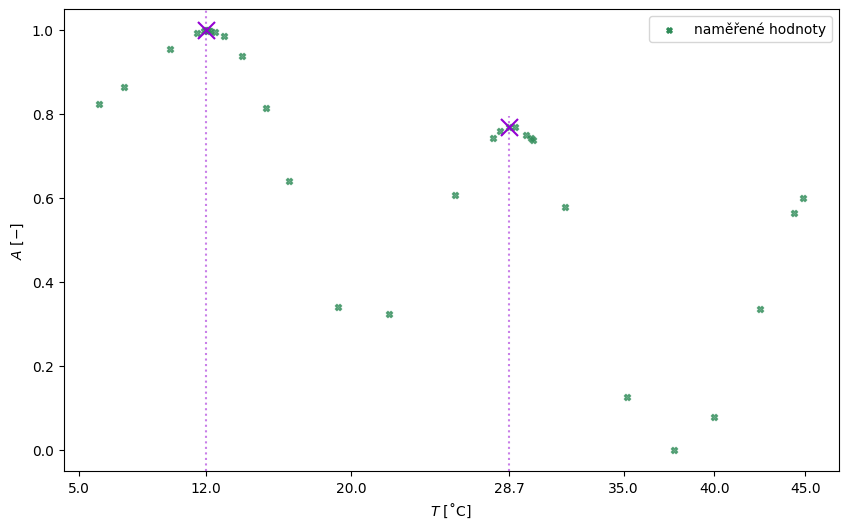

In [45]:
budici_proud = 766 # mA 
absorpce = 1-normalize(ukol_1["U [mV]"])

peak_absorpce, _ = signal.find_peaks(absorpce)
print(peak_absorpce)
for n, p in enumerate(peak_absorpce):
    print(f"Teplota {n}: { float(ukol_1["Teplota [˚C]"].iloc[[p]])}".replace(".", ","))

fig_ukol1 = plt.figure(figsize = (10, 6))
plt.scatter(ukol_1["Teplota [˚C]"], absorpce,
            color="seagreen", 
            marker="X", s=20, alpha=0.7,
            label="naměřené hodnoty")
for p in peak_absorpce:
    plt.scatter(ukol_1["Teplota [˚C]"].iloc[[p]], absorpce[p],
                color="darkviolet", 
                marker="x", s=150, alpha=1)
    plt.axvline(x=float(ukol_1["Teplota [˚C]"].iloc[[p]]), ymax=absorpce[p], 
                color="darkviolet", alpha=0.5, linestyle="dotted")
plt.xticks([5, 12, 20, 28.7, 35, 40, 45])
lgnd = plt.legend(scatterpoints=1, fontsize=10)
for handle in lgnd.legend_handles:
    handle.set_sizes([15])
    handle.set_alpha(1)
plt.xlabel('$T~\\mathrm{[˚C]}$ ', fontsize = 10)
plt.ylabel("$A~\\mathrm{[-]}$", fontsize = 10)
plt.savefig("./img/peaky_absorpce.pdf")
plt.show()


2.  Doba života na elektronové hladině 4 F_3/2 neodymu.

exponencialni fit: U=(38,4\pm 0,5)\cdot e^{(-0,0038\pm 0,0001)t}+(4,7\pm 0,5)


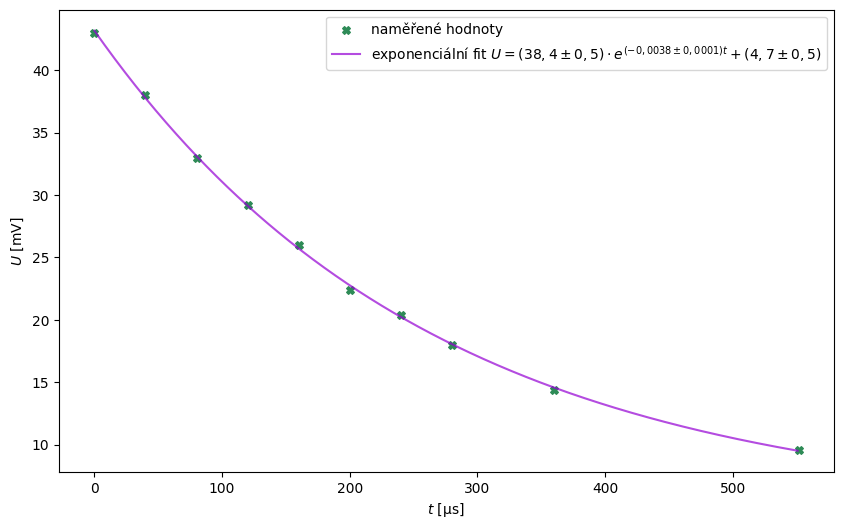

In [18]:
fitovane_parametry_exp, kovariance_parametru_exp = optimize.curve_fit(exponenciala, 
                                                                      xdata=ukol_2["T [\\mu s]"], 
                                                                      ydata=ukol_2["U [mV]"], 
                                                                      p0 = [40,-0.002,0]) # ocekavane parametry

sigma_parametru_exp = np.sqrt(np.diag(kovariance_parametru_exp)) # tohle vypocita presnost, s jakou byly parametry urceny
zaokrouhlene_parametry_exp = []
for j in range(len(fitovane_parametry_exp)): # zaokrouhleni na jednu platnou cifru
    zaokrouhlene_parametry_exp.append(zaokrouhleni(fitovane_parametry_exp[j], 
                                                         reference=sigma_parametru_exp[j]))

print(
    f"exponencialni fit: U=({zaokrouhlene_parametry_exp[0][0]}\\pm {zaokrouhlene_parametry_exp[0][1]})\\cdot e^{{({zaokrouhlene_parametry_exp[1][0]}\\pm {zaokrouhlene_parametry_exp[1][1]})t}}+({zaokrouhlene_parametry_exp[2][0]}\\pm {zaokrouhlene_parametry_exp[2][1]})".replace(".", ","))


t_axis = np.arange(0, np.max(ukol_2["T [\\mu s]"]))
fig_ukol2 = plt.figure(figsize = (10, 6))
plt.scatter(ukol_2["T [\\mu s]"], ukol_2["U [mV]"],
            color="seagreen", 
            marker="X", s=30, alpha=1,
            label="naměřené hodnoty")

plt.plot(t_axis, exponenciala(t_axis, fitovane_parametry_exp[0], fitovane_parametry_exp[1], fitovane_parametry_exp[2]),
         color = "darkviolet",  alpha=0.7,
         label = "exponenciální fit $U=(38.4\\pm 0.5)\\cdot e^{{(-0.0038\\pm 0.0001)t}}+(4.7\\pm 0.5)$".replace(".", ","))
lgnd = plt.legend(scatterpoints=1, fontsize=10)

plt.xlabel('$t~\\mathrm{[\\mu s]}$ ', fontsize = 10)
plt.ylabel("$U~\\mathrm{[mV]}$", fontsize = 10)
plt.savefig("./img/doba_zivota.pdf")
plt.show()


3.  Graf závislosti teploty diody na proudu diodou při konstantní vyzařované vlnové délce.


linearni fit: T=(-0,0209\pm 0,0003)I+(28,1\pm 0,2)


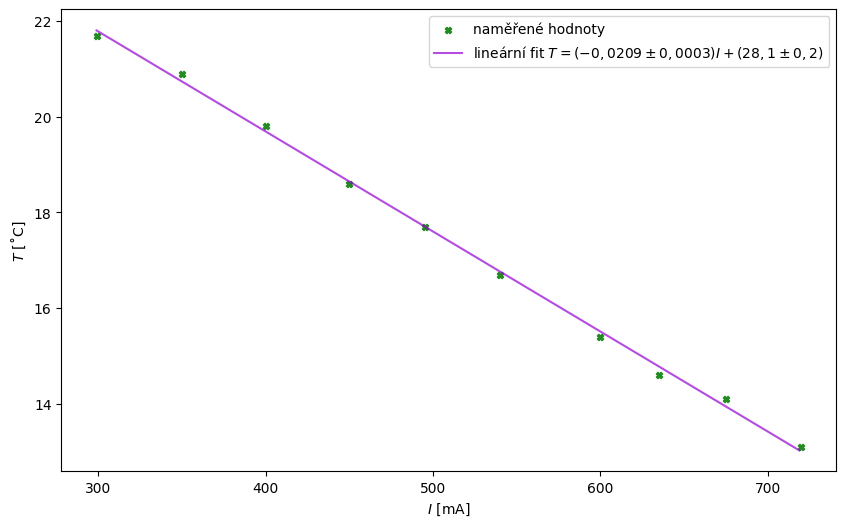

In [47]:

fitovane_parametry_lin, kovariance_parametru_lin = optimize.curve_fit(linear_fit, 
                                                                      xdata=ukol_3["I [mA]"], 
                                                                      ydata=ukol_3["T [˚C]"], 
                                                                      p0 = [-0.02, 30]) # ocekavane parametry

sigma_parametru_lin = np.sqrt(np.diag(kovariance_parametru_lin)) # tohle vypocita presnost, s jakou byly parametry urceny
zaokrouhlene_parametry_lin = []
for j in range(len(fitovane_parametry_lin)): # zaokrouhleni na jednu platnou cifru
    zaokrouhlene_parametry_lin.append(zaokrouhleni(fitovane_parametry_lin[j], 
                                                         reference=sigma_parametru_lin[j]))

print(
    f"linearni fit: T=({zaokrouhlene_parametry_lin[0][0]}\\pm {zaokrouhlene_parametry_lin[0][1]})I+({zaokrouhlene_parametry_lin[1][0]}\\pm {zaokrouhlene_parametry_lin[1][1]})".replace(".", ","))

I_axis = np.arange(np.min(ukol_3["I [mA]"]), np.max(ukol_3["I [mA]"]))
fig_ukol3 = plt.figure(figsize = (10, 6))
plt.scatter(ukol_3["I [mA]"], ukol_3["T [˚C]"],
            color="forestgreen", 
            marker="X", s=20, alpha=1,
            label="naměřené hodnoty")

plt.plot(I_axis, linear_fit(I_axis, fitovane_parametry_lin[0], fitovane_parametry_lin[1]),
         color = "darkviolet", alpha=0.7,
         label = "lineární fit $T=(-0,0209\\pm 0,0003)I + (28,1\\pm 0,2)$".replace(".", ","))
lgnd = plt.legend(scatterpoints=1, fontsize=10)

plt.xlabel('$I~\\mathrm{[mA]}$ ', fontsize = 10)
plt.ylabel("$T~\\mathrm{[˚C]}$", fontsize = 10)
plt.savefig("./img/zavislost_teploty_na_proudu.pdf")
plt.show()

4.  Graf závislosti výstupního výkonu laserové diody na proudu diodou při konstantní vyzařované vlnové délce.


linearni fit: U_\mathrm{dioda}=(0,58\pm 0,02)I+(-170\pm 10)


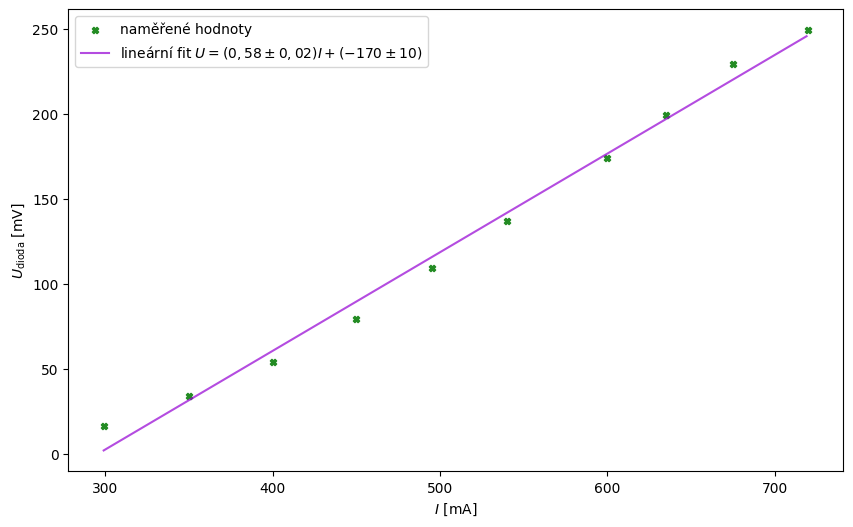

In [48]:
fitovane_parametry_lin, kovariance_parametru_lin = optimize.curve_fit(linear_fit, 
                                                                      xdata=ukol_4["I [mA]"], 
                                                                      ydata=ukol_4["U_dioda [mV]"], 
                                                                      p0 = [0.5, -100]) # ocekavane parametry

sigma_parametru_lin = np.sqrt(np.diag(kovariance_parametru_lin)) # tohle vypocita presnost, s jakou byly parametry urceny
zaokrouhlene_parametry_lin = []
for j in range(len(fitovane_parametry_lin)): # zaokrouhleni na jednu platnou cifru
    zaokrouhlene_parametry_lin.append(zaokrouhleni(fitovane_parametry_lin[j], 
                                                         reference=sigma_parametru_lin[j]))

print(
    f"linearni fit: U_\\mathrm{{dioda}}=({zaokrouhlene_parametry_lin[0][0]}\\pm {zaokrouhlene_parametry_lin[0][1]})I+({zaokrouhlene_parametry_lin[1][0]}\\pm {zaokrouhlene_parametry_lin[1][1]})".replace(".", ","))

I_axis = np.arange(np.min(ukol_4["I [mA]"]), np.max(ukol_4["I [mA]"]))
fig_ukol3 = plt.figure(figsize = (10, 6))
plt.scatter(ukol_4["I [mA]"], ukol_4["U_dioda [mV]"],
            color="forestgreen", 
            marker="X", s=20, alpha=1,
            label="naměřené hodnoty")

plt.plot(I_axis, linear_fit(I_axis, fitovane_parametry_lin[0], fitovane_parametry_lin[1]),
         color = "darkviolet", alpha=0.7,
         label = "lineární fit $U=(0,58\\pm 0,02)I + (-170\\pm 10)$".replace(".", ","))
lgnd = plt.legend(scatterpoints=1, fontsize=10)

plt.xlabel('$I~\\mathrm{[mA]}$ ', fontsize = 10)
plt.ylabel("$U_\\mathrm{{dioda}}~\\mathrm{[mV]}$", fontsize = 10)
plt.savefig("./img/zavislost_vykonu_na_proudu.pdf")
plt.show()

5.  Graf závislosti výstupní energie Nd:YAG laseru v závislosti na energii buzení 
        (ne na teplotě nebo proudu) s vyznačením prahu laserové generace.

linearni fit: U_\mathrm{las}=(0,64\pm 0,02)U_\mathrm{dioda}+(-12\pm 2)


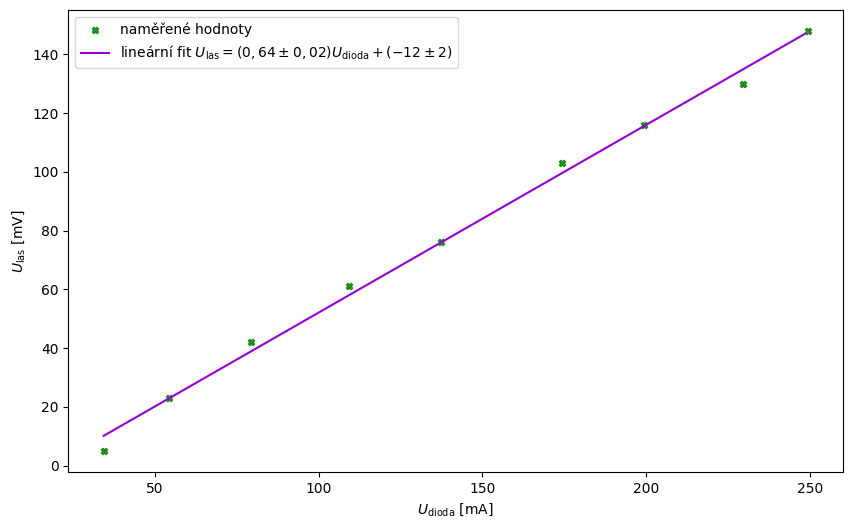

In [21]:
fitovane_parametry_lin, kovariance_parametru_lin = optimize.curve_fit(linear_fit, 
                                                                      xdata=ukol_5["U_dioda [mV]"], 
                                                                      ydata=ukol_5["U_las [mV]"], 
                                                                      p0 = [0.5, -10]) # ocekavane parametry

sigma_parametru_lin = np.sqrt(np.diag(kovariance_parametru_lin)) # tohle vypocita presnost, s jakou byly parametry urceny
zaokrouhlene_parametry_lin = []
for j in range(len(fitovane_parametry_lin)): # zaokrouhleni na jednu platnou cifru
    zaokrouhlene_parametry_lin.append(zaokrouhleni(fitovane_parametry_lin[j], 
                                                         reference=sigma_parametru_lin[j]))

print(
    f"linearni fit: U_\\mathrm{{las}}=({zaokrouhlene_parametry_lin[0][0]}\\pm {zaokrouhlene_parametry_lin[0][1]})U_\\mathrm{{dioda}}+({zaokrouhlene_parametry_lin[1][0]}\\pm {zaokrouhlene_parametry_lin[1][1]})".replace(".", ","))

U_axis = np.arange(np.min(ukol_5["U_dioda [mV]"]), np.max(ukol_5["U_dioda [mV]"]))
fig_ukol3 = plt.figure(figsize = (10, 6))
plt.scatter(ukol_5["U_dioda [mV]"], ukol_5["U_las [mV]"],
            color="forestgreen", 
            marker="X", s=20, alpha=1,
            label="naměřené hodnoty")

plt.plot(U_axis, linear_fit(U_axis, fitovane_parametry_lin[0], fitovane_parametry_lin[1]),
         color = "darkviolet", 
         label = "lineární fit $U_\\mathrm{{las}}=(0,64\\pm 0,02)U_\\mathrm{{dioda}} + (-12\\pm 2)$".replace(".", ","))
lgnd = plt.legend(scatterpoints=1, fontsize=10)

plt.xlabel('$U_\\mathrm{{dioda}}~\\mathrm{[mA]}$ ', fontsize = 10)
plt.ylabel("$U_\\mathrm{{las}}~\\mathrm{[mV]}$", fontsize = 10)
plt.savefig("./img/zavislost_las_na_diode.pdf")
plt.show()